## **Problem 1**
**part a**

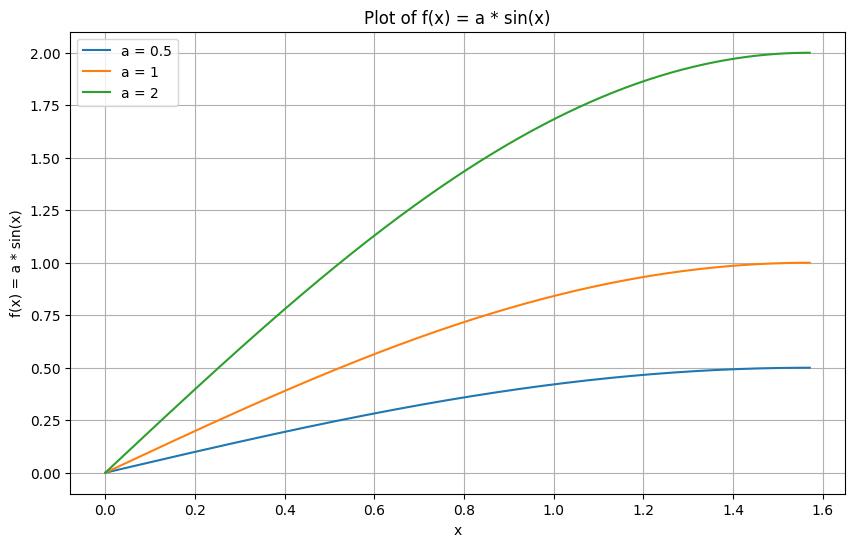

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, a):
    return a * np.sin(x)

x_min = 0
x_max = np.pi / 2
x_values = np.linspace(x_min, x_max, 500)
a_values = [0.5, 1, 2]

plt.figure(figsize=(10, 6))
for a in a_values:
    plt.plot(x_values, f(x_values, a), label=f'a = {a}')

plt.xlabel('x')
plt.ylabel('f(x) = a * sin(x)')
plt.title('Plot of f(x) = a * sin(x)')
plt.legend()
plt.grid(True)
plt.show()

## part b

In [3]:
from tabulate import tabulate
import pandas as pd

def monte_carlo_integration(a, x0, N):
    # x = x0 
    # integral_sum = 0 
    # interval = (0, np.pi/2)
    # for _ in range(N):
    #     step = np.random.uniform(-0.1, 0.1)
    #     x = min(max(x + step, interval[0]), interval[1])
    #     # x = np.random.uniform(*interval)
    #     integral_sum += f(x, a)
    # return (interval[1] - interval[0]) * (integral_sum / N)
    total = f(x0, a)
    x = x0
    for _ in range(N):
        step_size = 0.1 * np.random.rand()
        step_direction = 1 if np.random.rand() < 0.5 else -1
        x_test = x + step_direction * step_size

        if x_test > x_max:
            x_test = x_min + (x_test - x_max)
        elif x_test < x_min:
            x_test = x_max + (x_test - x_min)

        x = x_test
        total += f(x, a)
    integral = (x_max - x_min) * (total / N)
    return integral

x0_values = [0.2, 1, 1.5]
N_values = [10**3, 10**4, 10**5]
results = []

for a in a_values:
    for x0 in x0_values:
        for N in N_values:
            integration_result = monte_carlo_integration(a, x0, N)
            results.append({"a": a, "x0": x0, "N": N, "Integral": integration_result})
            

results_df = pd.DataFrame(results)
table_headers = ["a", "x0", "N", "Integral"]
table = tabulate(results_df.values, headers=table_headers, tablefmt="grid")
print(table)

+-----+------+--------+------------+
|   a |   x0 |      N |   Integral |
+=====+======+========+============+
| 0.5 |  0.2 |   1000 |   0.405048 |
+-----+------+--------+------------+
| 0.5 |  0.2 |  10000 |   0.52243  |
+-----+------+--------+------------+
| 0.5 |  0.2 | 100000 |   0.497907 |
+-----+------+--------+------------+
| 0.5 |  1   |   1000 |   0.595119 |
+-----+------+--------+------------+
| 0.5 |  1   |  10000 |   0.510482 |
+-----+------+--------+------------+
| 0.5 |  1   | 100000 |   0.505027 |
+-----+------+--------+------------+
| 0.5 |  1.5 |   1000 |   0.535512 |
+-----+------+--------+------------+
| 0.5 |  1.5 |  10000 |   0.474665 |
+-----+------+--------+------------+
| 0.5 |  1.5 | 100000 |   0.509544 |
+-----+------+--------+------------+
| 1   |  0.2 |   1000 |   0.995038 |
+-----+------+--------+------------+
| 1   |  0.2 |  10000 |   0.990421 |
+-----+------+--------+------------+
| 1   |  0.2 | 100000 |   0.991238 |
+-----+------+--------+------------+
|

It seems that as N increases, the accuracy of the integral estimate seems to increase as well, The affect of x0 does not seem to be that noticible when N is large. When N is lower, x0 introduces more variations making it more important but this is largely taken care of by large N's. These trends are true for all values of a

## **part c**

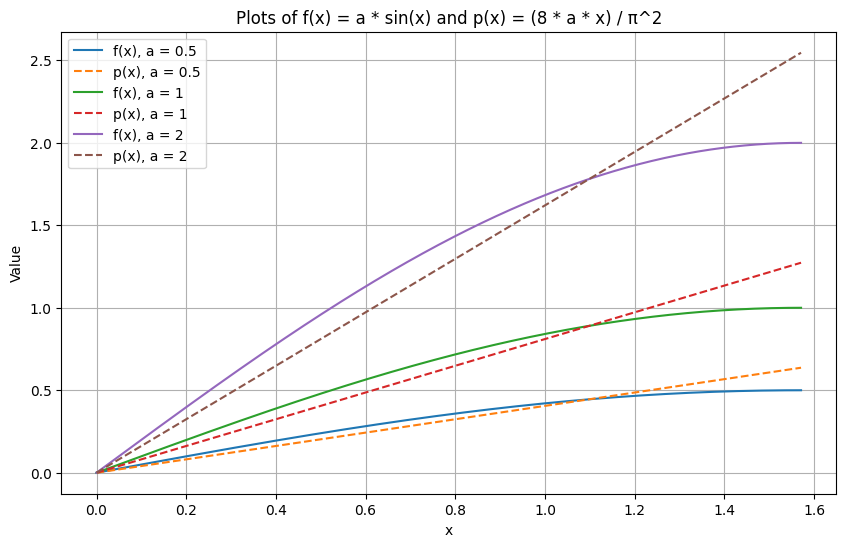

+-----+------+--------+------------+
|   a |   x0 |      N |   Integral |
+=====+======+========+============+
| 0.5 |  0.2 |   1000 |   0.748751 |
+-----+------+--------+------------+
| 0.5 |  0.2 |  10000 |   0.785473 |
+-----+------+--------+------------+
| 0.5 |  0.2 | 100000 |   0.781728 |
+-----+------+--------+------------+
| 0.5 |  1   |   1000 |   0.745614 |
+-----+------+--------+------------+
| 0.5 |  1   |  10000 |   0.780751 |
+-----+------+--------+------------+
| 0.5 |  1   | 100000 |   0.784251 |
+-----+------+--------+------------+
| 0.5 |  1.5 |   1000 |   0.810271 |
+-----+------+--------+------------+
| 0.5 |  1.5 |  10000 |   0.780124 |
+-----+------+--------+------------+
| 0.5 |  1.5 | 100000 |   0.778263 |
+-----+------+--------+------------+
| 1   |  0.2 |   1000 |   1.54362  |
+-----+------+--------+------------+
| 1   |  0.2 |  10000 |   1.57325  |
+-----+------+--------+------------+
| 1   |  0.2 | 100000 |   1.56088  |
+-----+------+--------+------------+
|

In [5]:
def p(x, a):
    return (8 * a * x) / (np.pi ** 2)

def p_normalized(x):
    return (8 * x) / (np.pi ** 2)

def monte_carlo_integration_part_c(a, x0, N):

    total = f(x0, a) / p_normalized(x0)
    x = x0
    for _ in range(N):
        step_size = 0.1 * np.random.rand()
        step_direction = 1 if np.random.rand() < 0.5 else -1
        x_test = x + step_direction * step_size

        if x_test > x_max:
            x_test = x_min + (x_test - x_max)
        elif x_test < x_min:
            x_test = x_max + (x_test - x_min)

        alpha = p_normalized(x_test) / p_normalized(x)
        if np.random.rand() <= alpha:
            x = x_test
        # x = x_test
        total += f(x, a) / p_normalized(x)
    integral = (x_max - x_min) * (total / N)
    return integral

results_c = []

for a in a_values:
    for x0 in x0_values:
        for N in N_values:
            integration_result = monte_carlo_integration_part_c(a, x0, N)
            results_c.append({"a": a, "x0": x0, "N": N, "Integral": integration_result})

plt.figure(figsize=(10, 6))
for a in a_values:
    plt.plot(x_values, f(x_values, a), label=f'f(x), a = {a}')
    plt.plot(x_values, p(x_values, a), '--', label=f'p(x), a = {a}')

#plt.plot(x_values, p_normalized(x_values), label='p_normalized')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Plots of f(x) = a * sin(x) and p(x) = (8 * a * x) / π^2')
plt.legend()
plt.grid(True)
plt.show()

results_c_df = pd.DataFrame(results_c)
table_headers = ["a", "x0", "N", "Integral"]
table = tabulate(results_c_df.values, headers=table_headers, tablefmt="grid")
print(table)

As N increases, the accuracy of the integral estimate improves and the impact of the starting point x0 diminishes. For lower N, x0 introduces more variability making it more influential but this is largely mitigated with larger N. The distribution is usable but not ideal as its linear shape does not align well with the sinusoidal shape of f(x) but for the range we use (0, np.pi / 2), it seems to be okay. 

## **Part d**

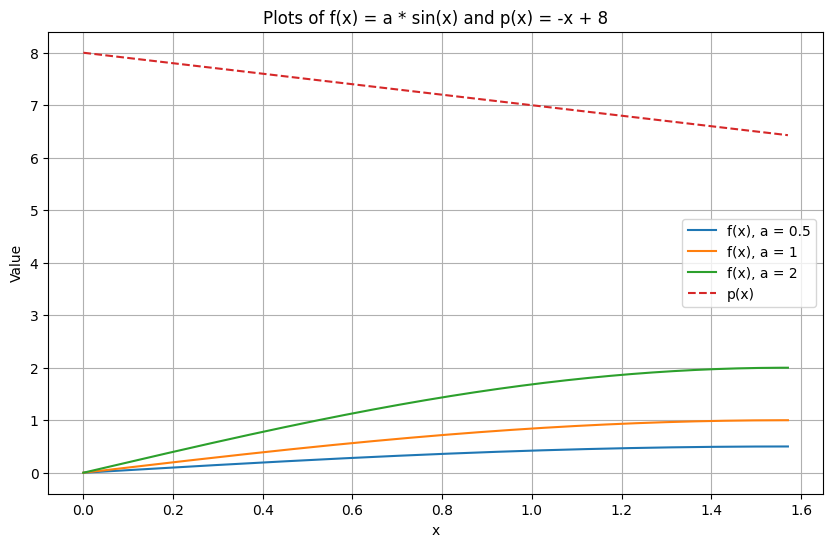

+-----+------+--------+------------+
|   a |   x0 |      N |   Integral |
+=====+======+========+============+
| 0.5 |  0.2 |   1000 |   0.862153 |
+-----+------+--------+------------+
| 0.5 |  0.2 |  10000 |   0.8336   |
+-----+------+--------+------------+
| 0.5 |  0.2 | 100000 |   0.788973 |
+-----+------+--------+------------+
| 0.5 |  1   |   1000 |   0.847838 |
+-----+------+--------+------------+
| 0.5 |  1   |  10000 |   0.818965 |
+-----+------+--------+------------+
| 0.5 |  1   | 100000 |   0.783619 |
+-----+------+--------+------------+
| 0.5 |  1.5 |   1000 |   0.771874 |
+-----+------+--------+------------+
| 0.5 |  1.5 |  10000 |   0.778653 |
+-----+------+--------+------------+
| 0.5 |  1.5 | 100000 |   0.78304  |
+-----+------+--------+------------+
| 1   |  0.2 |   1000 |   1.60451  |
+-----+------+--------+------------+
| 1   |  0.2 |  10000 |   1.67259  |
+-----+------+--------+------------+
| 1   |  0.2 | 100000 |   1.61011  |
+-----+------+--------+------------+
|

In [27]:
def p(x):
    return -x + 8

def p_normalized(x):
    return p(x) / (4 * np.pi - (np.pi ** 2) / 8)

def monte_carlo_integration_part_d(a, x0, N):
    total = f(x0, a) / p_normalized(x0)
    x = x0
    for _ in range(N):
        step_size = 0.1 * np.random.rand()
        step_direction = 1 if np.random.rand() < 0.5 else -1
        x_test = x + step_direction * step_size

        if x_test > x_max:
            x_test = x_min + (x_test - x_max)
        elif x_test < x_min:
            x_test = x_max + (x_test - x_min)

        alpha = p_normalized(x_test) / p_normalized(x)
        if np.random.rand() <= alpha:
            x = x_test
        total += f(x, a) / p_normalized(x)
    integral = (x_max - x_min) * (total / N)
    return integral

results_d = []

for a in a_values:
    for x0 in x0_values:
        for N in N_values:
            integration_result = monte_carlo_integration_part_d(a, x0, N)
            results_d.append({"a": a, "x0": x0, "N": N, "Integral": integration_result})

plt.figure(figsize=(10, 6))
for a in a_values:
    plt.plot(x_values, f(x_values, a), label=f'f(x), a = {a}')
plt.plot(x_values, p(x_values), '--', label=f'p(x)')

plt.xlabel('x')
plt.ylabel('Value')
plt.title('Plots of f(x) = a * sin(x) and p(x) = -x + 8')
plt.legend()
plt.grid(True)
plt.show()

results_d_df = pd.DataFrame(results_d)
table_headers = ["a", "x0", "N", "Integral"]
table = tabulate(results_d_df.values, headers=table_headers, tablefmt="grid")
print(table)

As N increases, the accuracy of the integral estimate improves and the impact of the starting point x0 diminishes. For lower N, x0 introduces more variability making it more influential but this is largely mitigated with larger N. The distribution is not ideal in this case.

## **Part e**

Repeating the integration process for parts c and d yields slightly different results each time due to the randomness in Monte Carlo sampling. This variability is more noticeable with smaller N values, as fewer samples lead to less stable estimates. As N increases, the estimates converge closer to the true value, reducing variability. 

Additionally, the choice of distribution p(x) seems to have an affect:
part c with is better aligned with f(x), potentially resulting in more stable estimates than part d with, which does not match f(x) as closely.